In [1]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


In [2]:
#Store file path in a variable and read in csv

file = "CleanedYouTube.csv"

yt_df = pd.read_csv(file)

#Print head

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,2017-11-13T17:13:01.000Z,748374
1,1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2017-11-13T07:30:00.000Z,2418783
2,2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,2017-11-12T19:05:24.000Z,3191434
3,3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,2017-11-13T11:00:04.000Z,343168
4,4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2017-11-12T18:01:41.000Z,2095731


In [3]:
#trending date vs. views

trending_df = yt_df[["Video Title", "Video ID", "Trending Date", "Total Views"]]

trending_df.head()

,Video Title,Video ID,Trending Date,Total Views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,748374
1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,3191434
3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,343168
4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2095731


In [4]:
#Organize by Video Title using Video ID
videotitle_df = trending_df.sort_values(["Video ID", "Trending Date", "Total Views"], ascending = (True, False, True))

videotitle_df.head()

,Video Title,Video ID,Trending Date,Total Views
40159,Mindy Kaling's Daughter Had the Perfect Reacti...,-0CMnp02rNY,18.11.06,800359
39958,Mindy Kaling's Daughter Had the Perfect Reacti...,-0CMnp02rNY,18.10.06,792613
39746,Mindy Kaling's Daughter Had the Perfect Reacti...,-0CMnp02rNY,18.09.06,754273
39535,Mindy Kaling's Daughter Had the Perfect Reacti...,-0CMnp02rNY,18.08.06,705986
39326,Mindy Kaling's Daughter Had the Perfect Reacti...,-0CMnp02rNY,18.07.06,605506


In [5]:
#Find out how many days each video was trending

trending_days = videotitle_df["Video ID"].value_counts()

trending_days

j4KvrAUjn6c    29
8h--kFui1JA    29
ulNswX3If6U    28
6S9c5nnDd_s    28
iILJvqrAQ_w    28
               ..
goP4Z5wyOlM     1
IXJhN4cOVM0     1
WArjc_PF2b4     1
UrSxvUc5R6Q     1
rovAxg5A48Q     1
Name: Video ID, Length: 6351, dtype: int64

In [6]:
trendingSummary_df = pd.DataFrame(trending_days)

#Make the index a column
trendingSummary_df = trendingSummary_df.reset_index()

#Change column names
trendingSummary_df = trendingSummary_df.rename(columns={"Video ID": "Number of Days Trending",
                                                       "index":"Video ID"})



trendingSummary_df.head()

,Video ID,Number of Days Trending
0,j4KvrAUjn6c,29
1,8h--kFui1JA,29
2,ulNswX3If6U,28
3,6S9c5nnDd_s,28
4,iILJvqrAQ_w,28


In [7]:
len(trendingSummary_df)

6351

In [8]:
#Get rid of all but the last day trending so I only have the total views per video

#Sort by video id, then date

yt_df = yt_df.sort_values(["Video ID", "Trending Date"], ascending=False)

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16559,16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,2018-01-30T18:30:04.000Z,199041
16360,16360,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.05.02,2018-01-30T18:30:04.000Z,154206
144,144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,2017-11-09T09:00:07.000Z,378750
36895,36944,kanye west / charlamagne interview,zxwfDlhJIpw,18.25.05,2018-05-01T15:57:06.000Z,8442986
36693,36742,kanye west / charlamagne interview,zxwfDlhJIpw,18.24.05,2018-05-01T15:57:06.000Z,8431178


In [9]:
#Remove extra trending dates

yt_df = yt_df.drop_duplicates("Video ID", keep='first')

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16559,16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,2018-01-30T18:30:04.000Z,199041
144,144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,2017-11-09T09:00:07.000Z,378750
36895,36944,kanye west / charlamagne interview,zxwfDlhJIpw,18.25.05,2018-05-01T15:57:06.000Z,8442986
1183,1183,100 People Hold Their Breath for as Long as Th...,zxUwbflE1SY,17.19.11,2017-11-13T13:00:10.000Z,225280
27082,27082,This Is Me - Cover by Shoshana Bean Featuring ...,zwEn-ambXLw,18.31.03,2018-03-22T08:30:07.000Z,190898


In [10]:
#Check Length...It matches above so we are good!
len(yt_df)

6351

I found that by trying to use video title when I did value counts it got a different number than video id. I decided that using video id would be better incase there were some videos that were different but had the same name or vice versa.

In [11]:
#Merge trendingSumamry_df and yt_df

youTubeMerged_df = pd.merge(trendingSummary_df, yt_df, on="Video ID", how="outer")

youTubeMerged_df.head()


,Video ID,Number of Days Trending,Unnamed: 0,Video Title,Trending Date,Time Published,Total Views
0,j4KvrAUjn6c,29,38108,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,18.31.05,2018-05-13T18:03:56.000Z,9081270
1,8h--kFui1JA,29,38130,Sam Smith - Pray (Official Video) ft. Logic,18.31.05,2018-05-09T17:00:00.000Z,17424422
2,ulNswX3If6U,28,38122,Selena Gomez - Back To You (Lyric Video),18.31.05,2018-05-10T16:00:11.000Z,40205404
3,6S9c5nnDd_s,28,38093,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,18.31.05,2018-05-15T13:01:12.000Z,12834122
4,iILJvqrAQ_w,28,38121,Charlie Puth - BOY [Official Audio],18.31.05,2018-05-11T04:00:34.000Z,8441561


In [12]:
#Clean it up

ytMaster_df = youTubeMerged_df[["Video Title","Video ID","Number of Days Trending","Time Published","Total Views"]]

ytMaster_df

,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561
...,...,...,...,...,...
6346,Iraq-Iran earthquake: Deadly tremor hits borde...,goP4Z5wyOlM,1,2017-11-12T21:16:40.000Z,34785
6347,Celebrities rally around bullied boy after he ...,IXJhN4cOVM0,1,2017-12-11T13:06:08.000Z,84968
6348,"Stock market plunges, but it's not time to panic",WArjc_PF2b4,1,2018-02-05T21:26:11.000Z,58231
6349,JUSTICE LEAGUE Spoiler Review and Discussion,UrSxvUc5R6Q,1,2017-11-18T19:42:33.000Z,44805


In [13]:
#Export cleaned data to a new csv
ytMaster_df.to_csv("MasterYouTube.csv", index=True, header=True)

In [14]:
#Create a Bar Graph of Video Titles vs. how many days it was trending

#ytMaster_df.plot(kind='pie',x='Video Title',y='Number of Days Trending')

#Found this was not very practical! 

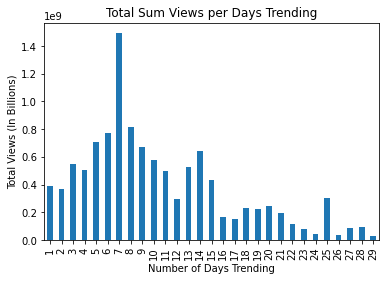

In [15]:
#Create a Bar Graph of how many days it was trending vs. views

#Format Views

#ytMaster_df["Total Views"] = ytMaster_df["Total Views"].map("{:,}")

#ytMaster_df.plot(kind='bar',x='Number of Days Trending',y='Total Views')
#This didn't work so had to change it to groupby

ytMaster_df.groupby("Number of Days Trending")["Total Views"].sum().plot(kind="bar")

plt.title("Total Sum Views per Days Trending")
plt.xlabel("Number of Days Trending")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsSumperDaysTrendingBar")

plt.show()


##### This appears to show that approximately 5-9 days trending will get the most views

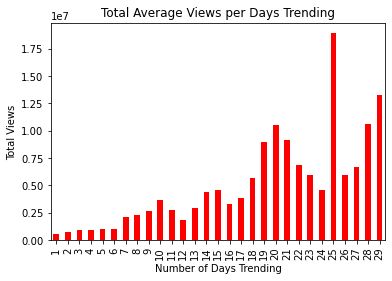

In [16]:
#Same thing but show average views for number of days trending
ytMaster_df.groupby("Number of Days Trending")["Total Views"].mean().plot(kind="bar", color="red")

plt.title("Total Average Views per Days Trending")
plt.xlabel("Number of Days Trending")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsMeanperDaysTrendingBar")

plt.show()

##### This appears to show opposite of above, and shows a trend that the longer a video trends, the more views it will get.

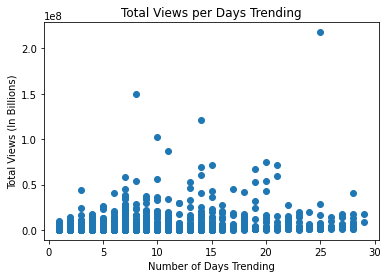

In [17]:
#Scatterplot
plt.scatter(ytMaster_df["Number of Days Trending"], ytMaster_df["Total Views"])
plt.title("Total Views per Days Trending")
plt.xlabel("Number of Days Trending")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsperDaysTrendingScatter")

plt.show()

### Obviously, since I am dealing with time, scatterplots may not be the best chart to use.

In [18]:
#Correlation
daystrending = ytMaster_df["Number of Days Trending"]
views = ytMaster_df["Total Views"]

correlation = sts.pearsonr(daystrending, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is 0.24


## This shows there is no noticable correlation between the number of days it is trending and the number of views it gets.

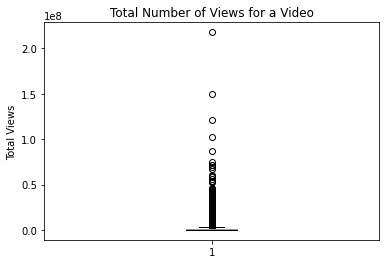

In [19]:
#Box plot of total number of views from all videos trending for 7 days.
views=ytMaster_df["Total Views"]

fig1, ax1 = plt.subplots()
ax1.set_title("Total Number of Views for a Video")
ax1.set_ylabel("Total Views")
ax1.boxplot(views)

plt.savefig("OutputCharts/ViewsBoxplot")
plt.show()

##### There are a lot of outliers, so the data is not normally distributed. Makes it hard to draw conclusions/see trends

In [20]:
mean = np.mean(ytMaster_df["Total Views"])
median = np.median(ytMaster_df["Total Views"])
mode = sts.mode(ytMaster_df["Total Views"])
upper = ytMaster_df["Total Views"].max()
lower = ytMaster_df["Total Views"].min()

print(f"The mean total number of views is: {round(mean, 2)}")
print(f"The median total number of views is: {round(median, 2)}")
print(f"The max total number of views is: {round(upper, 2)}")
print(f"The minimum total number of views is: {round(lower, 2)}")


The mean total number of views is: 1768571.31
The median total number of views is: 494964.0
The max total number of views is: 217750076
The minimum total number of views is: 559


What can I infer from this information? 
